# PRAT : Vessel segmentation notebook

In [ ]:
#@title Imports
%load_ext autoreload
%autoreload 2
!pip install aicspylibczi rasterio
from utils import load_json, get_bounding_box_from_contour
from preprocessing import read_czi, read_tif, roi_mask, vessels_mask
from plot_functions import implot, plot_contours
from processing import get_vessels_mask, get_init_mask
from skimage import measure
import numpy as np
from skimage.morphology import area_closing,area_opening, closing

### Preprocessing

In [32]:
#@title Parameters for data preprocessing{ form-width: "30%" }
CROP_DICT = load_json('./crop.json') #@param
FILE_IDX = 1 #@param

In [ ]:
tile,g=read_czi('scenes',  FILE_IDX, CROP_DICT)
tif = read_tif(FILE_IDX, CROP_DICT, g.shape)

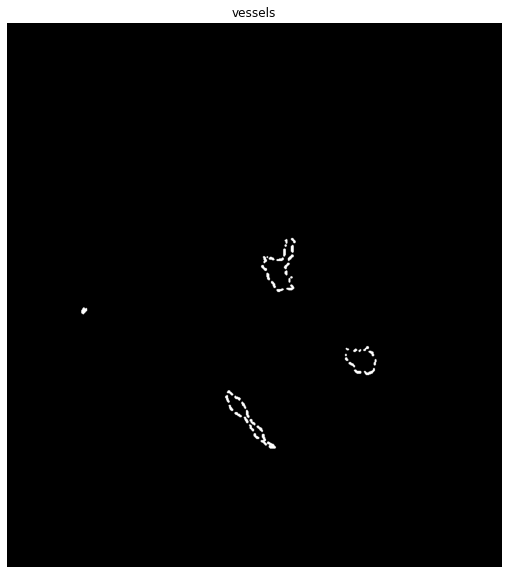

In [35]:
# ground truth
vessels = vessels_mask(tif)
implot(vessels,'vessels')

### Morphological filtering 

In [34]:
#@title Select parameters 
LP_THRESHOLD=75#@param
HP_THRESHOLD=0.7#@param
MIN_AREA=200#@param
MAX_AREA=50000#@param
TILE_SIZE=512#@param

In [36]:
# get initial mask. Set low_ctl to True to spot lumen (in case of low ctl presence)
clot_mask, contours, g = get_init_mask(g, LP_THRESHOLD, MIN_AREA-50, low_ctl=False)

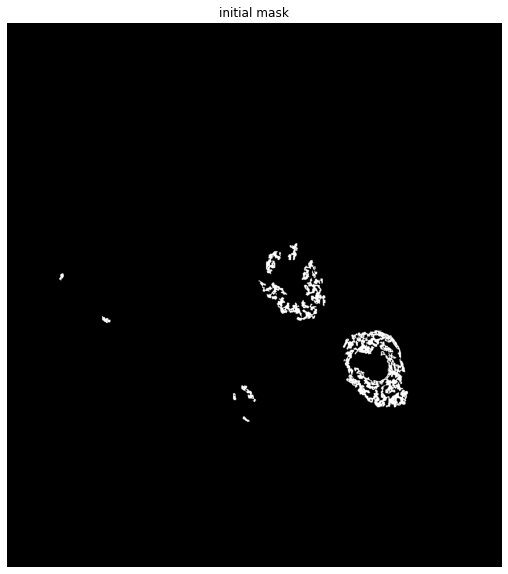

In [37]:
implot(clot_mask, 'initial mask')

In [39]:
bbs = get_bounding_box_from_contour(contours)
len(bbs)

276

In [40]:
closed_vessels, opened_from_closed_vessels, opened_vessels, new_bbs = get_vessels_mask(bbs, g, TILE_SIZE, LP_THRESHOLD, MIN_AREA, MAX_AREA, HP_THRESHOLD)

100%|██████████| 12/12 [00:20<00:00,  1.74s/it]


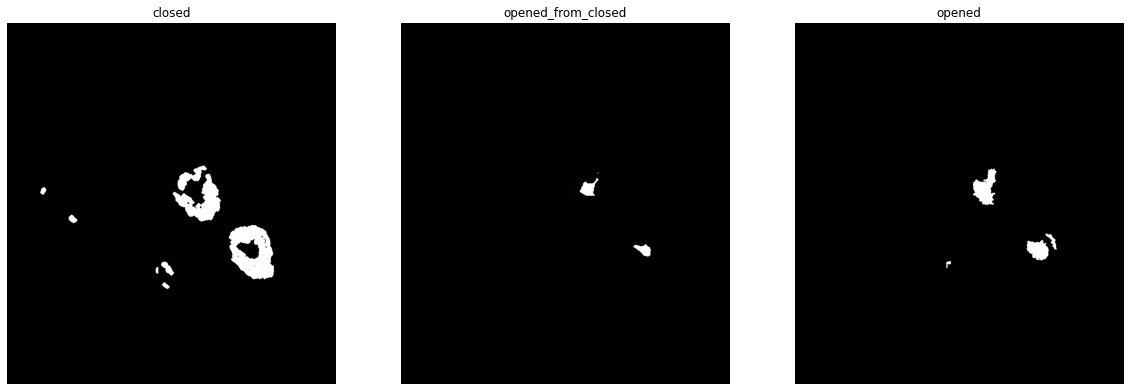

In [41]:
implot([closed_vessels, opened_from_closed_vessels, opened_vessels],['closed','opened_from_closed', 'opened'], rows=1)

In [42]:
for i in range(tile.shape[0]):
  for j in range(tile.shape[1]):
    tile[i,j]= np.where(((tile[i,j,0]<=5)and(tile[i,j,1]<=5)and(tile[i,j,2]<=5)), 255, tile[i,j])

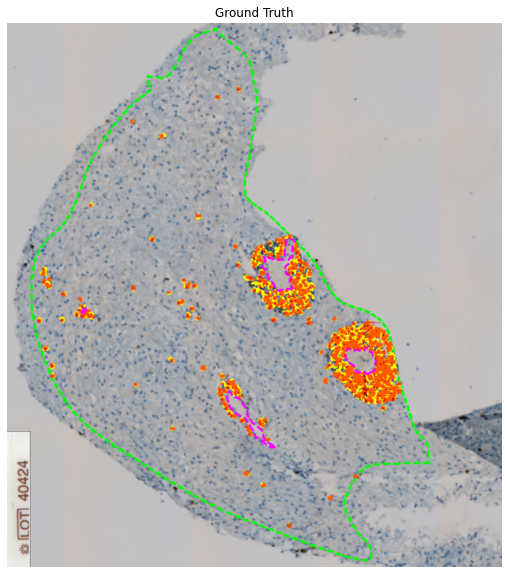

In [43]:
implot(tif, 'Ground Truth')

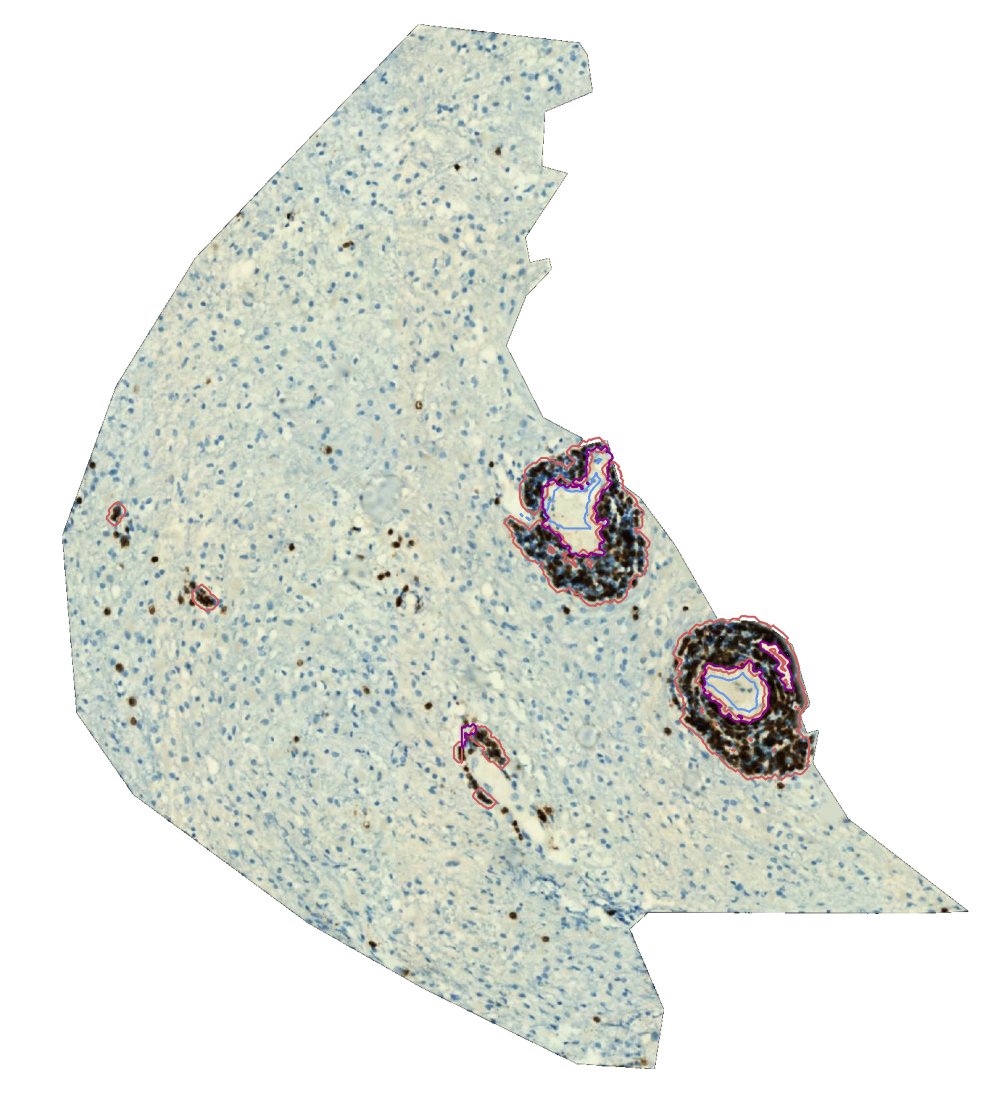

In [44]:
plot_contours([closed_vessels, opened_from_closed_vessels, opened_vessels], tile, color=['indianred', 'cornflowerblue', 'darkmagenta'])